In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-consumer-finance-complaints/database.sqlite
/kaggle/input/us-consumer-finance-complaints/consumer_complaints.csv


In [2]:
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Embedding
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('../input/us-consumer-finance-complaints/consumer_complaints.csv')
data.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [4]:
data = data[['product', 'consumer_complaint_narrative']]
data.head()

,product,consumer_complaint_narrative
0,Mortgage,NaN
1,Mortgage,NaN
2,Credit reporting,NaN
3,Student loan,NaN
4,Debt collection,NaN


In [5]:
data.isnull().sum()

product                              0
consumer_complaint_narrative    489151
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
text = data['consumer_complaint_narrative'].tolist()

In [8]:
product_category = list(data['product'].unique())
labels = []
for i in data['product']:
    labels.append(product_category.index(i))
    
print(labels[:10])

[0, 1, 2, 2, 2, 2, 2, 2, 3, 1]


In [9]:
print(product_category)

['Debt collection', 'Consumer Loan', 'Mortgage', 'Credit card', 'Credit reporting', 'Student loan', 'Bank account or service', 'Payday loan', 'Money transfers', 'Other financial service', 'Prepaid card']


In [10]:
token = Tokenizer()
token.fit_on_texts(text)
vocabs = token.index_word
vocabs_len = len(token.word_index) + 1
vocabs_len

55178

In [11]:
vocabs

{1: 'xxxx',
 2: 'the',
 3: 'i',
 4: 'to',
 5: 'and',
 6: 'a',
 7: 'my',
 8: 'of',
 9: 'that',
 10: 'was',
 11: 'they',
 12: 'in',
 13: 'on',
 14: 'have',
 15: 'not',
 16: 'for',
 17: 'this',
 18: 'me',
 19: 'is',
 20: 'with',
 21: 'it',
 22: 'credit',
 23: 'from',
 24: 'account',
 25: 'xx',
 26: 'as',
 27: 'had',
 28: '00',
 29: 'be',
 30: 'them',
 31: 'we',
 32: 'would',
 33: 'loan',
 34: 'by',
 35: 'at',
 36: 'payment',
 37: 'are',
 38: 'bank',
 39: 'an',
 40: 'been',
 41: 'or',
 42: 'no',
 43: 'but',
 44: 'has',
 45: 'do',
 46: 'did',
 47: 'told',
 48: 'debt',
 49: 'all',
 50: "n't",
 51: 'report',
 52: 'when',
 53: 'am',
 54: 'were',
 55: 'which',
 56: 'their',
 57: 'received',
 58: 'mortgage',
 59: 'information',
 60: 'time',
 61: 'card',
 62: 'called',
 63: 'so',
 64: 'any',
 65: 'company',
 66: "''",
 67: 'after',
 68: 'you',
 69: 'if',
 70: 'our',
 71: 'pay',
 72: 'never',
 73: 'because',
 74: "'s",
 75: 'payments',
 76: 'out',
 77: 'call',
 78: 'can',
 79: 'will',
 80: 'he',
 

In [12]:
encoded_text = token.texts_to_sequences(text)
print(encoded_text[:3])

[[1, 44, 761, 3, 214, 30, 2704, 28, 16, 1, 108, 622, 2, 257, 8, 36, 3, 83, 30, 1330, 125, 5, 56, 27411, 1647, 16, 2704, 28, 11, 336, 4, 2424, 3, 214, 30, 5, 109, 353, 37, 67, 18, 146, 78, 3, 305, 17, 985, 16, 6, 163, 3, 297, 84, 1308, 108, 296], [101, 4, 5406, 12, 2, 103, 290, 9, 3, 10, 47, 34, 1301, 852, 38, 5, 2, 103, 9, 10, 208, 4, 2, 22, 127, 353, 3, 10, 306, 4, 1074, 6, 364, 79, 88, 12, 310, 4, 160, 2, 189, 5, 154, 2, 391, 1630, 29, 204, 23, 7, 22, 51, 49, 1616, 3, 27, 6, 506, 9, 10, 889, 5, 21, 10, 2970, 6, 472, 699, 34, 198, 65, 2, 198, 65, 5, 2, 2573, 27412, 27413, 2, 778, 111, 8, 2, 33, 43, 3, 10, 47, 34, 1301, 852, 38, 9, 82, 10, 110, 6, 111, 101, 13, 2, 33, 12, 364, 1142, 184, 363, 57, 64, 257, 26, 4, 152, 82, 10, 110, 6, 111, 3, 102, 6, 1559, 36, 1050, 2, 986, 48, 3, 87, 83, 2, 5456, 88, 110, 1702, 4, 71, 2, 2793, 8, 2, 48, 43, 12, 2265, 16, 2, 1426, 8, 2, 391, 1630, 13, 7, 22, 51, 35, 118, 368, 12, 1, 104, 340, 7, 22, 1555, 175, 21, 740, 6, 658, 111, 8, 756, 28, 43, 52, 3,

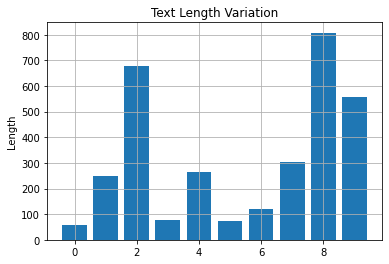

In [13]:
text_length = [len(i) for i in encoded_text[:10]]
plt.bar([i for i in range(10)], text_length)
plt.title('Text Length Variation')
plt.ylabel('Length')
plt.grid(True)
plt.show()

In [14]:
max_length = max(len(x) for x in encoded_text)
max_length

864

In [15]:
X = pad_sequences(encoded_text, maxlen=max_length, padding='post')
print(X)

[[   1   44  761 ...    0    0    0]
 [ 101    4 5406 ...    0    0    0]
 [  12   25   25 ...    0    0    0]
 ...
 [   3   14   40 ...    0    0    0]
 [   3  434  885 ...    0    0    0]
 [  38    8  226 ...    0    0    0]]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, np.array(labels), test_size=0.2, random_state=42)

In [17]:
vec_size = 300

model = Sequential()
model.add(Embedding(vocabs_len, vec_size, input_length=max_length))

model.add(Conv1D(kernel_size=64, filters=8, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))

model.add(GlobalMaxPooling1D())

model.add(Dense(len(product_category), activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 864, 300)          16553400  
_________________________________________________________________
conv1d (Conv1D)              (None, 801, 8)            153608    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 400, 8)            0         
_________________________________________________________________
dropout (Dropout)            (None, 400, 8)            0         
_________________________________________________________________
dense (Dense)                (None, 400, 32)           288       
_________________________________________________________________
dropout_1 (Dropout)          (None, 400, 32)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 400, 16)           5

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, epochs = 5, validation_data=(X_test, y_test))

Epoch 1/5
1671/1671 [==============================] - 1398s 836ms/step - loss: 1.1372 - accuracy: 0.6299 - val_loss: 1.1195 - val_accuracy: 0.7339
Epoch 2/5
1671/1671 [==============================] - 1406s 841ms/step - loss: 0.7322 - accuracy: 0.7834 - val_loss: 0.9991 - val_accuracy: 0.7786
Epoch 3/5
1671/1671 [==============================] - 1398s 836ms/step - loss: 0.6066 - accuracy: 0.8190 - val_loss: 1.0109 - val_accuracy: 0.7803
Epoch 4/5
1671/1671 [==============================] - 1400s 838ms/step - loss: 0.5167 - accuracy: 0.8450 - val_loss: 0.9020 - val_accuracy: 0.7899
Epoch 5/5
1671/1671 [==============================] - 1401s 838ms/step - loss: 0.4489 - accuracy: 0.8630 - val_loss: 0.8561 - val_accuracy: 0.8025


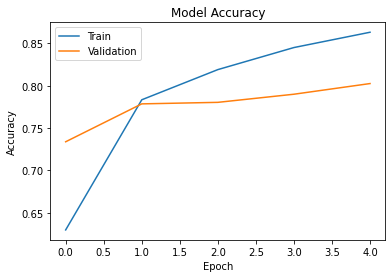

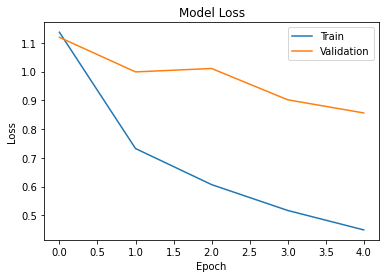

In [20]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [21]:
model.save('classifier.model')

In [22]:
from tensorflow.keras.models import load_model
model = load_model('./classifier.model')

In [23]:
test = ['I became past due on my Discover Credit Card last year. In an effort to remedy the situation I agreed to allow Discover to automatically debit my checking account in the amount of {$140.00} for 6 months. In exchange for allowing this to take place, Discover agreed to credit the monthly interest and late fees for the 6 month period, place a one time credit on my account of {$700.00} at the end of the 6 month period, and to " re-age '' my account with the credit bureau so that the previously reported delinquent payment would be removed. This arrangement started on XXXX XXXX, 2015. After making the 6 on-time payments, Discover has informed me that they do n\'t have notes showing me the {$700.00} payment promise. However, they do have notes on my account that reflect the promise to re-age my account, but they refuse to do so with the XXXX major credit bureaus.']
encoded_test = token.texts_to_sequences(test)
test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
test_predict = model.predict(test)
print(product_category[int(np.argmax(test_predict[0]))])

Credit card


In [24]:
test = ['Key Bank Collection Settlement called and asked to set up a payment plan because my loan had defaulted ( I did not default, I filed for bankruptcy and was told that immediately defaults this loan ). I agreed to making a regular monthly payment. I have repeatedly asked for a statement with the current balance and payment history and have not received one for months, although I continue sending payment for fear of defaulting. I believe my right is to receive written notice of the balances.']
encoded_test = token.texts_to_sequences(test)
test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
test_predict = model.predict(test)
print(product_category[int(np.argmax(test_predict[0]))])

Debt collection
